# 1. Introdução

O eterno embate entre popularidade e qualidade de um produto midiático sempre foi um tópico de interesse daqueles que o consomem. A maioria das pessoas gostaria que aquele produto que tanto admira seja considerado de qualidade, afinal ninguém gosta de ouvir que uma obra adorada é inferior. Porém, muitos trabalhos independem da opinião de um especialista para ganharem o coração do público. Os Video Games não são uma excessão. Enquanto jogos avaliados por críticos especialistas como obras primas costumam fazer sucesso, existem também os que são considerados medíocres e mesmo assim vendem milhões pelo mundo.

De outro modo, podemos analisar também mais um aspecto que influencia enormemente no êxito comercial de um Video Game, seu gênero.

# 2. Metodologia

Para analisar melhor essa relação, encontramos uma base de dados sobre Video Games que venderam pelo menos 100 000 cópias de 1980 a 2016, gerada a partir do site [VGChartz](http://www.vgchartz.com/). Além de incluir os nomes dos jogos, a base de dados apresenta a plataforma para que o jogo foi lançado, o ano em que foi lançado, o gênero do jogo, a empresa que o publicou, o desenvolvedor, a classificação indicativa e por fim, as vendas separadas por região, além das vendas globais e as avaliações de críticos e usuários que jogaram o jogo, além de sua quantidade.

# 3. Resultados

# 3a. Caracterização

Maior número de vendas implica em maior qualidade?

Qual a relação entre gênero e classificação indicativa?

O desenvolvedor do jogo influencia na quantidade de jogadores?

In [336]:
import pandas as pd

df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [337]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


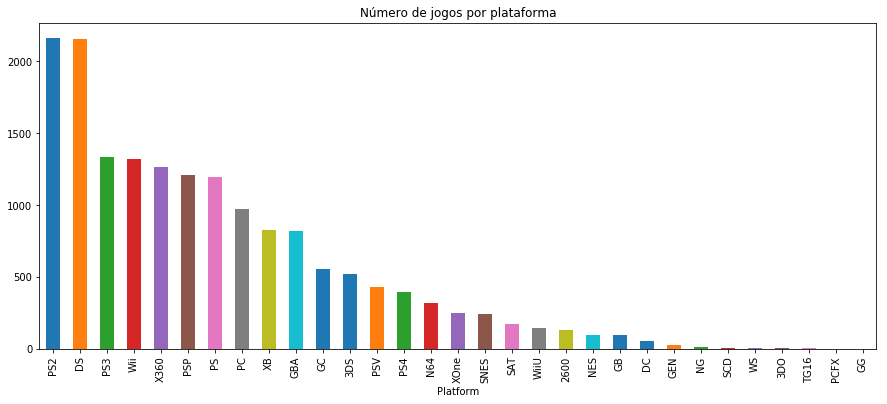

In [339]:
import matplotlib.pyplot as plt

df1 = df.copy()
df1 = df1.groupby(['Platform']).count()
df1 = df1['Name']
df1 = df1.sort_values(ascending=False)
plt.title('Número de jogos por plataforma')
df1.plot.bar()

fig_size[0] = 15
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

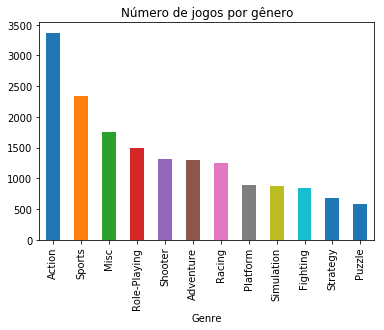

In [341]:
df1 = df.copy()
df1 = df1.groupby(['Genre']).count()
df1 = df1['Name']
df1 = df1.sort_values(ascending=False)
plt.title('Número de jogos por gênero')
df1.plot.bar()

fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

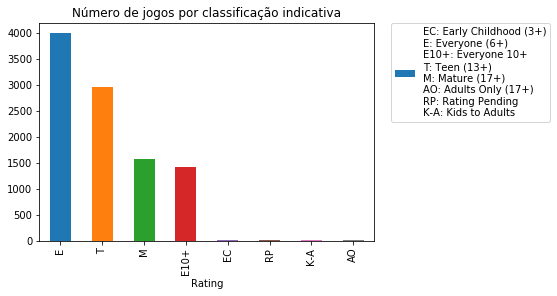

In [342]:
df1 = df.copy()
df1 = df1.groupby(['Rating']).count()
df1 = df1['Name']
df1 = df1.sort_values(ascending=False)
plt.title('Número de jogos por classificação indicativa')
df1.plot.bar(label='EC: Early Childhood (3+)\nE: Everyone (6+)\nE10+: Everyone 10+\nT: Teen (13+)\nM: Mature (17+)\nAO: Adults Only (17+)\nRP: Rating Pending\nK-A: Kids to Adults')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

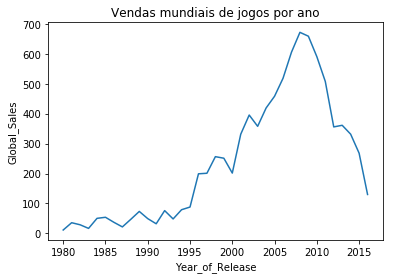

In [343]:
df1 = df.copy()
d = ['Year_of_Release', 'Global_Sales']
df1 = df1[d]
df1 = df1.groupby('Year_of_Release').sum()
df1 = df1.drop([2017.0, 2020.0])
plt.title('Vendas mundiais de jogos por ano')
plt.xlabel('Year_of_Release')
plt.ylabel('Global_Sales')
plt.plot(df1)

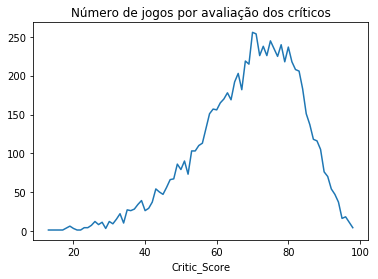

In [344]:
df1 = df.copy()
df1 = df1.groupby(['Critic_Score']).count()
df1 = df1['Name']
df1
plt.title('Número de jogos por avaliação dos críticos')
plt.xlabel('Critic_Score')
plt.plot(df1)

# 3b. Previsão

P1: Maior número de vendas implica em maior qualidade?

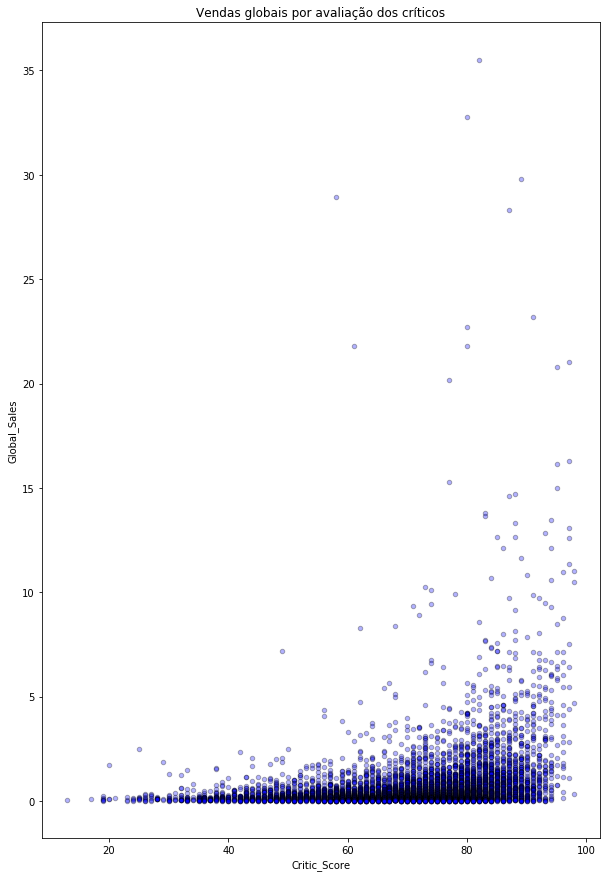

In [346]:
from sklearn.linear_model import LinearRegression
import numpy as np

new_df = df.copy()
new_df = new_df.drop([0])
# Removi o jogo Wii Sports porque ele é vendido juntamente com o console Nintendo Wii,
# então suas vendas eram absurdamente maiores do que o resto
new_df = new_df.dropna() # Removi os valores NaN
# Plotei as variáveis para ter uma noção inicial
new_df.plot.scatter(x='Critic_Score', y='Global_Sales', color='blue', alpha=0.3, edgecolor='k')
plt.title('Vendas globais por avaliação dos críticos')

fig_size[0] = 10
fig_size[1] = 15
#fig_size[1] = 30
plt.rcParams["figure.figsize"] = fig_size

In [347]:
from sklearn.model_selection import train_test_split

# Escolhi qual variável será X e qual será y e as separei em treino e teste
X = new_df['Critic_Score'].values
X = X.reshape(-1, 1)
y = new_df['Global_Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Modelo da regressão linear
model = LinearRegression(normalize=True)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [348]:
from sklearn.metrics import mean_squared_error, r2_score

# Avaliando o modelo
print('Coeficiente: ', model.coef_)
print('Intercepto: ', model.intercept_)
print("Erro quadrático médio: %.2f" % mean_squared_error(y_test, prediction))
print('r2: %.2f' % r2_score(y_test, prediction)) # r2 = 1: previsão perfeita

Coeficiente:  [0.0336611]
Intercepto:  -1.6014218648560687
Erro quadrático médio: 3.52
r2: 0.05


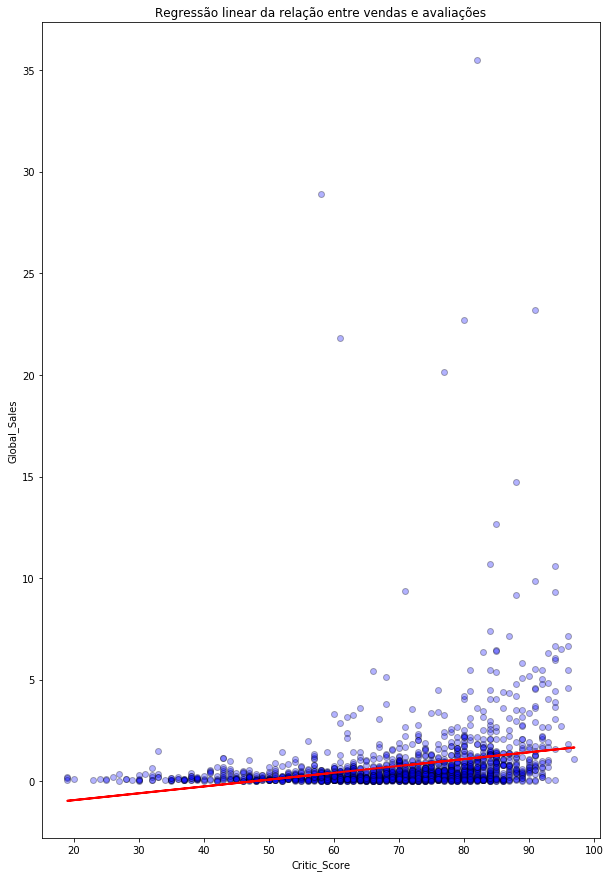

In [349]:
# Plotando o resultado
plt.scatter(X_test, y_test,  color='blue', alpha=0.3, edgecolor='k')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.title('Regressão linear da relação entre vendas e avaliações')
plt.xlabel('Critic_Score')
plt.ylabel('Global_Sales')

plt.show()

Hipótese nula: qualidade não influencia nas vendas (chance igual de vender sendo o jogo bom ou não) -> distribuição uniforme

In [350]:
from sklearn.model_selection import permutation_test_score

# Teste de hipótese por permutação
score, permutation_scores, pvalue = permutation_test_score(model, X_test, prediction, cv=3)
print("Pontuação da classificação %s \np-valor : %s" % (score, pvalue))

Pontuação da classificação 1.0 
p-valor : 0.009900990099009901


Como o p-valor é muito pequeno podemos inferir que a hipótese nula não é válida, ou seja, as vendas e a qualidade do jogo tem relação

P2: Relação entre vendas em regiões específicas do mundo e gênero do jogo

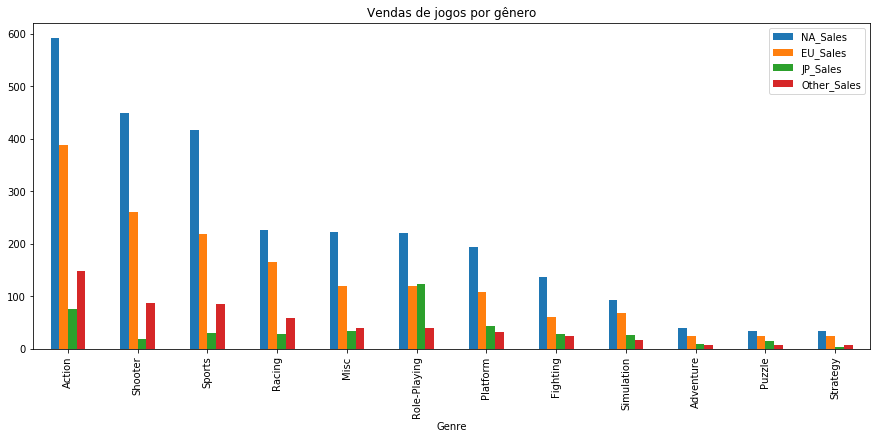

In [360]:
d = ['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df1 = new_df[d]
df1 = df1.groupby(['Genre']).sum()
df1 = df1.sort_values(by='NA_Sales', ascending=False)
df1.plot.bar()
plt.title('Vendas de jogos por gênero')

fig_size[0] = 15
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

In [361]:
from sklearn.linear_model import LogisticRegression

X = new_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].values
y = new_df['Genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [362]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=40, weights='distance')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [363]:
from sklearn.metrics import precision_recall_fscore_support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, prediction, average='macro')
print('Precisão: ', precision, '\nRevocação: ', recall, '\nF1: ', fscore)
print('Pontuação da classificação: ', model.score(X_test, y_test))

Precisão:  0.1581875566372674 
Revocação:  0.1374135295265204 
F1:  0.1343127145293432
Pontuação da classificação:  0.24794841735052756


([<matplotlib.axis.YTick at 0x19add089278>,
 <a list of 12 Text yticklabel objects>)

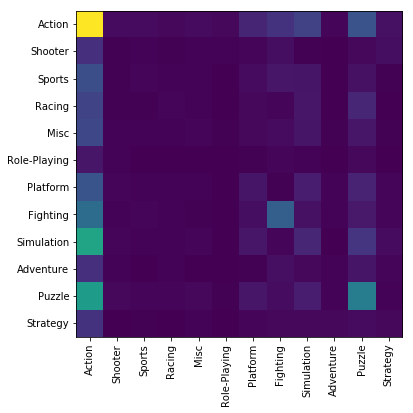

In [364]:
import matplotlib.pyplot as plt

plt.imshow(confusion_matrix(y_test, prediction))
labels = df1.index
labels = pd.Series(labels)
plt.imshow(confusion_matrix(y_test, prediction))
plt.xticks(labels.index, labels, rotation=90)
plt.yticks(labels.index, labels)

Hipótese nula: gênero não influencia nas vendas do jogo pelo mundo (os jogos de cada gênero vendem uniformemente)

In [365]:
# Teste de hipótese por permutação
score, permutation_scores, pvalue = permutation_test_score(model, X_test, prediction, cv=3)
print("Pontuação da classificação %s \np-valor : %s" % (score, pvalue))

Pontuação da classificação 0.7625875133843999 
p-valor : 0.009900990099009901


Como o p-valor é muito pequeno podemos inferir que a hipótese nula não é válida, ou seja, as vendas e o gênero do jogso tem relação

# 4. Conclusões